<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

netflix_concat = pd.read_csv("datos/netflix_concat.csv")
pd.set_option("display.max_columns", None)
netflix_concat.drop(columns= "Unnamed: 0").head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentary,"October 2, 2020",90.0,7.5,English
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,NaN,NaN,NaN,NaN,NaN


#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

In [2]:
numero_tipos= netflix_concat["type"].value_counts()
numero_tipos

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [3]:
numero_tipos= list(netflix_concat["type"].value_counts())
numero_tipos

[6131, 2676]

([<matplotlib.patches.Wedge at 0x1efd6a0f810>,
 [Text(-0.8976720015074074, -0.6357554386001626, 'TV Show'),
  Text(0.8976720975037978, 0.6357553030554541, 'Movie')],
 [Text(-0.48963927354949494, -0.34677569378190687, '69.6%'),
  Text(0.4896393259111624, 0.34677561984842953, '30.4%')])

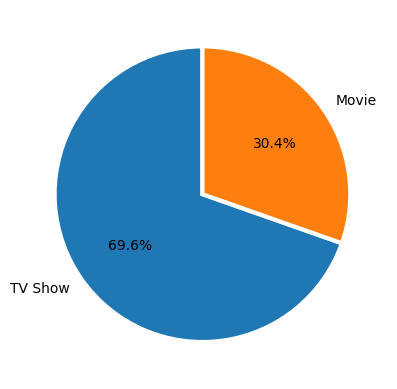

In [4]:
#Quería tener este grafico aquí aunque no me lo pidan
tipo= ["TV Show", "Movie"]
plt.pie(numero_tipos, labels= tipo, labeldistance=1.10, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct= '%1.1f%%',  startangle= 90)

C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\3031436369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "type" , data= netflix_concat, palette=["#33B5FF", "#FFBB33"])


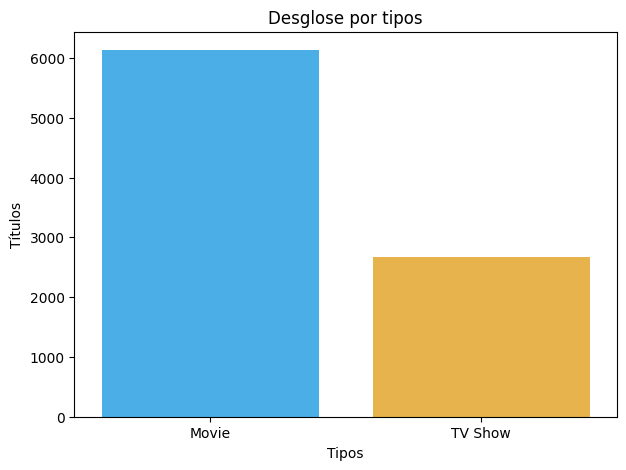

In [5]:
plt.figure(figsize= (7,5))
sns.countplot(x= "type" , data= netflix_concat, palette=["#33B5FF", "#FFBB33"])
plt.title("Desglose por tipos")
plt.xlabel("Tipos")
plt.ylabel("Títulos");

#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



In [6]:
ratings=netflix_concat["rating"].value_counts().index
ratings

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min'],
      dtype='object', name='rating')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\120096686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "rating" , data= netflix_concat, order= ratings, palette= "mako")


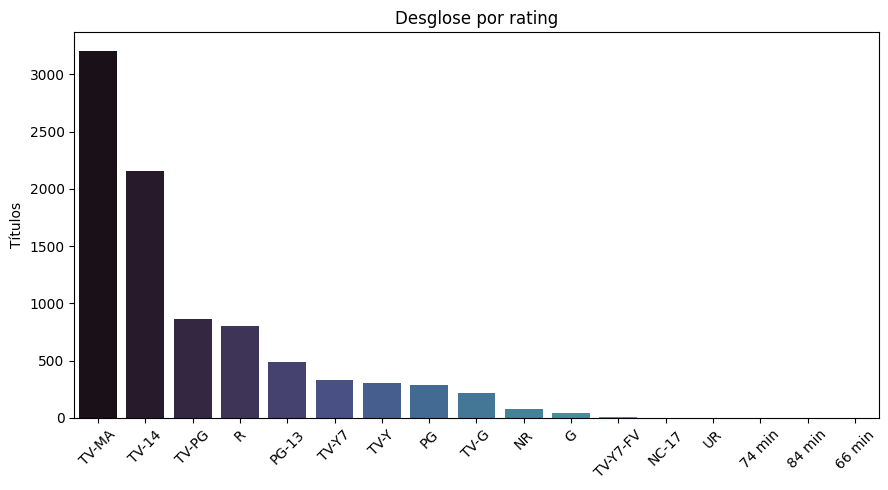

In [7]:
plt.figure(figsize= (9,5))
sns.countplot(x= "rating" , data= netflix_concat, order= ratings, palette= "mako")
plt.title("Desglose por rating")
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("Títulos")
plt.tight_layout();

#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



In [8]:
top= netflix_concat.groupby("country")["title"].count().sort_values()[-10:]
top10=top.reset_index()
top10

,country,title
0,Egypt,106
1,Mexico,110
2,France,124
3,Spain,145
4,Canada,181
5,South Korea,199
6,Japan,245
7,United Kingdom,419
8,India,972
9,United States,2818


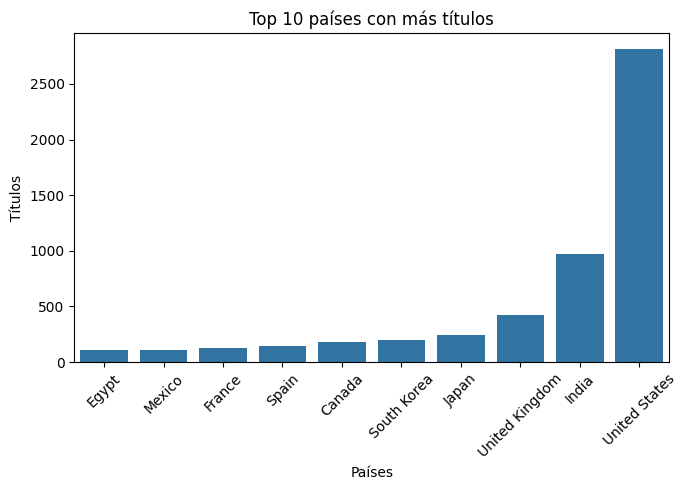

In [9]:

plt.figure(figsize=(7,5))
sns.barplot(x="country", y="title", data= top10)
plt.xlabel("Países")
plt.ylabel("Títulos")
plt.title("Top 10 países con más títulos")
plt.xticks(rotation= 45)
plt.tight_layout();


#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

In [10]:
datos=round(netflix_concat.groupby("rating")["IMDB Score"].mean().drop_duplicates().dropna().reset_index(), 2)


C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\1502491182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "rating", y= "IMDB Score", data= datos, palette= "mako")


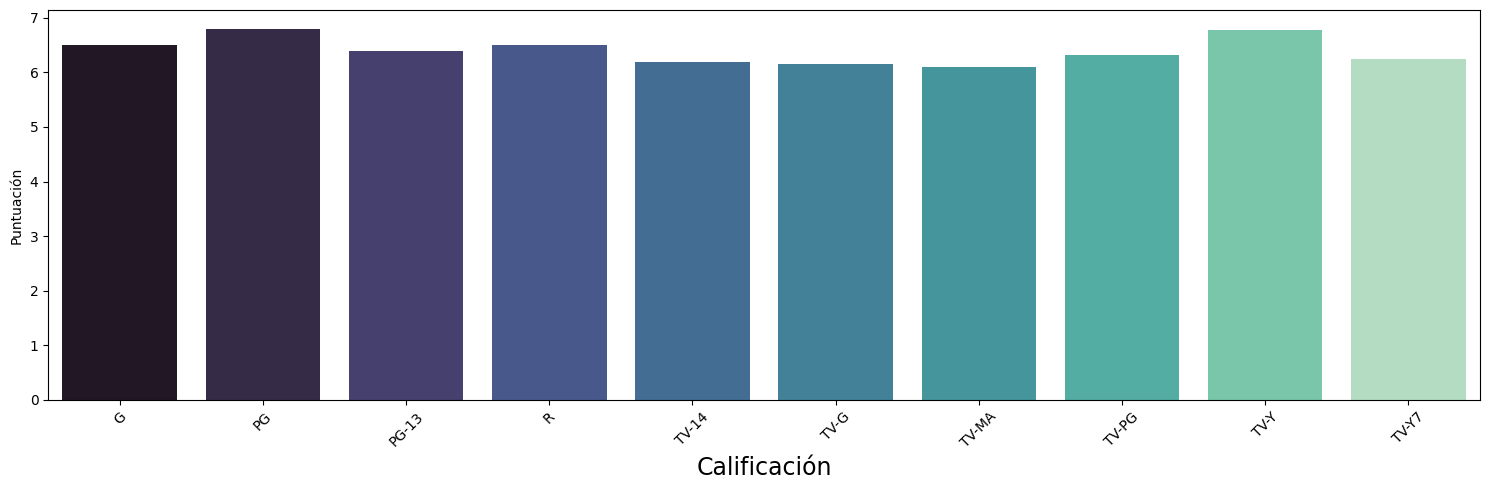

In [11]:
plt.figure(figsize= (15,5))
sns.barplot(x= "rating", y= "IMDB Score", data= datos, palette= "mako")
plt.xlabel("Calificación", fontsize= 17)
plt.ylabel("Puntuación")
plt.xticks(rotation= 45)
plt.tight_layout();


#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


In [12]:
netflix_concat["Runtime"].dropna()

0        90.0
141     117.0
624      91.0
834      95.0
836     117.0
        ...  
5901     80.0
5906     84.0
5910     84.0
5912     83.0
5916     81.0
Name: Runtime, Length: 513, dtype: float64

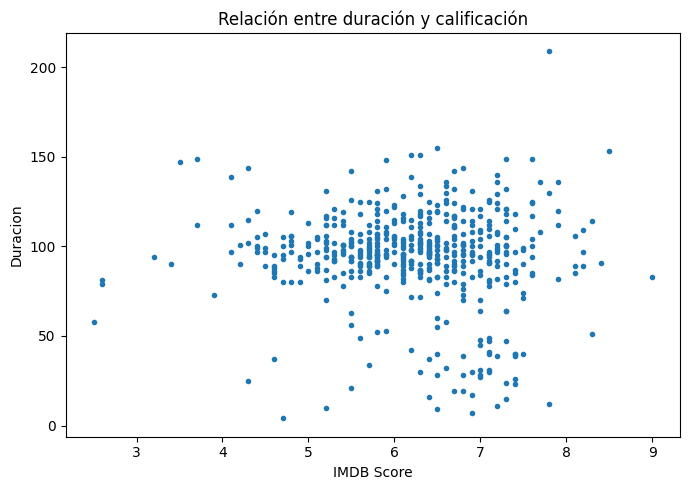

In [13]:

plt.figure(figsize= (7,5))
plt.scatter(x= "IMDB Score", y= "Runtime", data= netflix_concat, s=9)
plt.xlabel("IMDB Score")
plt.ylabel("Duracion")
plt.title("Relación entre duración y calificación")
plt.tight_layout();

#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

In [14]:
top=netflix_concat["Language"].value_counts().nlargest(10).index
top10= netflix_concat[netflix_concat["Language"].isin(top)]


C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\3404046011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "IMDB Score", y = "Language", data= top10, palette= 'viridis')


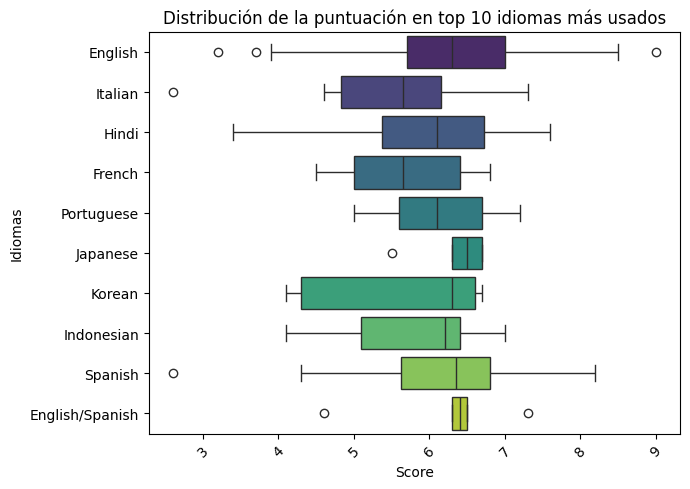

In [15]:
plt.figure(figsize= (7,5)) 
sns.boxplot(x= "IMDB Score", y = "Language", data= top10, palette= 'viridis')
plt.xlabel("Score")
plt.xticks(rotation= 45)
plt.ylabel("Idiomas")
plt.title("Distribución de la puntuación en top 10 idiomas más usados")
plt.tight_layout();


#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



In [16]:
netflix_concat_drop= netflix_concat.dropna()

In [17]:
top10.head(1)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentary,"October 2, 2020",90.0,7.5,English


In [18]:
top= netflix_concat_drop["director"].value_counts().nlargest(10).index
top10= netflix_concat_drop[netflix_concat_drop["director"].isin(top)]

C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\2197080697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "director", y= "IMDB Score", data= top10, palette= "viridis")


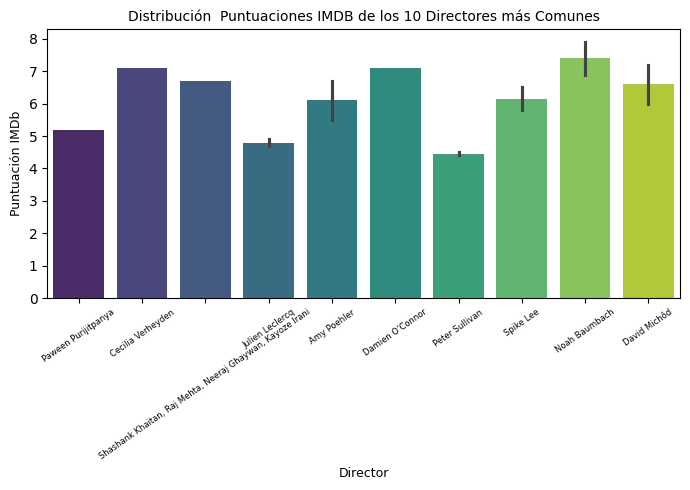

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize= (7,5))
sns.barplot(x= "director", y= "IMDB Score", data= top10, palette= "viridis")
plt.title('Distribución  Puntuaciones IMDB de los 10 Directores más Comunes', fontsize=10)
plt.xlabel('Director', fontsize=9)
plt.ylabel('Puntuación IMDb', fontsize=9)
plt.xticks(rotation=35, fontsize= 6)
plt.tight_layout()
plt.show()
plt.tight_layout();

#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


In [20]:
ratings=netflix_concat["rating"].value_counts().index
ratings

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min'],
      dtype='object', name='rating')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\2075661617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "rating" , data= netflix_concat, order= ratings, palette= "mako", ax= axes[1])


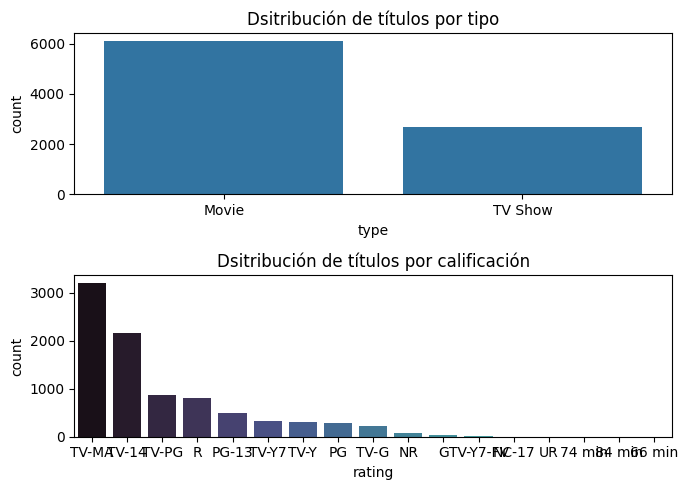

In [28]:
fig, axes= plt.subplots(2,1, figsize= (7,5), sharex= False)
sns.countplot(x= "type", data= netflix_concat, ax = axes[0])
sns.countplot(x= "rating" , data= netflix_concat, order= ratings, palette= "mako", ax= axes[1])
axes[0].set_title("Dsitribución de títulos por tipo")
axes[1].set_title("Dsitribución de títulos por calificación")
plt.tight_layout()


#### Ejercicio 10: ¿Cómo se distribuyen los títulos por país para los 6 principales países? Tienes que crear una gráfica para cada país mostrando los resultados en un subplot. Deberás: 

En el ejercicio 10, tenemos que sacar el numero de pelis y series (el tipo) para los 6 principales paises, mostrando cada pais en un subplot.

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 


### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.